# Random sampling

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Distributions

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions

(10000,)
[7 5 3 ... 5 4 7]
Sum of freq:  999.3


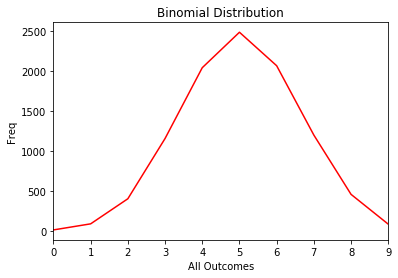

In [2]:
# Draw samples from a binomial distribution.

"""
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.binomial.html#numpy.random.RandomState.binomial
"""

# number of trials, probability of success for each trial, size
trials, probability, test = 10, .5, 10000
outcomes = np.random.binomial(trials, probability, test)
print(outcomes.shape)
print(outcomes)

all_outcome = range(trials)
freq = np.zeros(trials)
for outcome in all_outcome:
    for a_outcome in outcomes:
        if outcome == a_outcome:
            freq[outcome] += 1

print("Sum of freq: ", np.mean(freq))

plt.plot(all_outcome, freq, 'r')
plt.title("Binomial Distribution")
plt.xlabel('All Outcomes')
plt.ylabel('Freq')
plt.xlim([0, trials-1])
plt.show()

In [3]:
# Decide between 2 outcomes randomly

if np.random.binomial(1, 0.5) == 1:
    print("Success :)")
else:
    print("Fail :(")

Fail :(


In [4]:
print("Choose 2 values from 0 to 4: ", np.random.choice(5, size=2))
print("Choose 2 values from the list: ", np.random.choice(["Gyan", "is", "the", "great"], size=2))
print("Choose 2 values from 0 to 1 with replacement: ", np.random.choice(2, size=2, replace=False))

Choose 2 values from 0 to 4:  [3 2]
Choose 2 values from the list:  ['the' 'great']
Choose 2 values from 0 to 1 with replacement:  [1 0]


## Gaussian distribution:

\begin{align}
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
\end{align}

Normal distribution assumes that x is a scalar value.
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html

[-0.21047582 -0.05006866  0.24265149  0.13921364 -0.14953974 -0.02540645
 -0.11105731  0.01757028 -0.054919   -0.14838352]
True
True


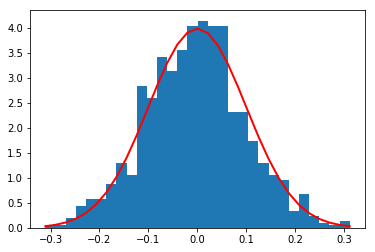

In [3]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print(s[0:10])

print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

count, bins, ignored = plt.hist(s, bins=30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


# Discrete Uniform Distribution

In [8]:
# Return random integers from low (inclusive) to high (exclusive)

random_objects = np.random.randint(low=0, high=5, size=20)
print(random_objects)


[2 2 3 1 1 2 3 3 3 0 1 4 2 1 4 3 4 0 2 2]
